In [ ]:
#All packages
import pandas as pd 
import numpy as np
from matplotlib import pyplot as pt
import itertools as it
from numpy.linalg import inv
import statsmodels.api as sm
from numpy.linalg import inv

In [ ]:
#data
population_data = np.array(pd.read_csv(r'C:\Users\eparl\Documents\Graduate Math\Project Proposal\project_one_data.csv'))
post24data = np.array(pd.read_csv(r'C:\Users\eparl\Documents\Graduate Math\Project Proposal\project_one_data_1.csv'))
post24data_kansas = np.array(pd.read_csv(r'C:\Users\eparl\Documents\Graduate Math\Project Proposal\project_one_data_2.csv'))
post24data_games = np.array(pd.read_csv(r'C:\Users\eparl\Documents\Graduate Math\Project Proposal\project_one_data_3.csv'))

53
33
33


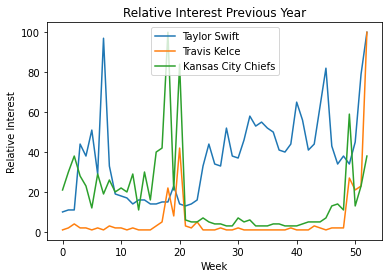

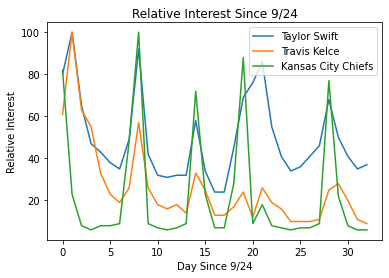

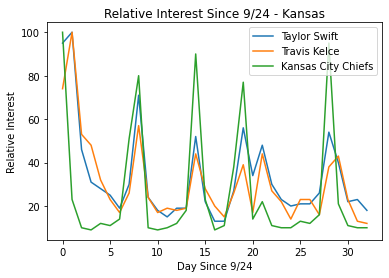

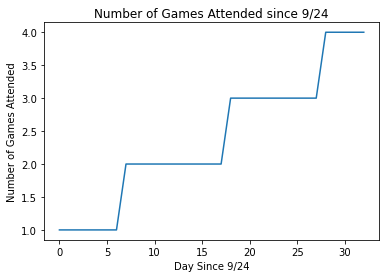

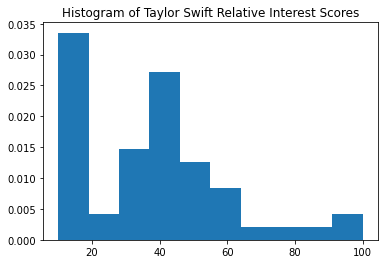

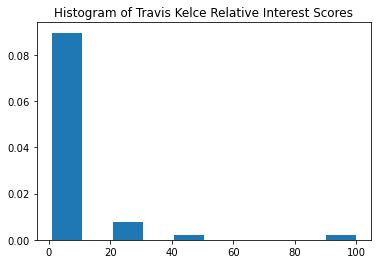

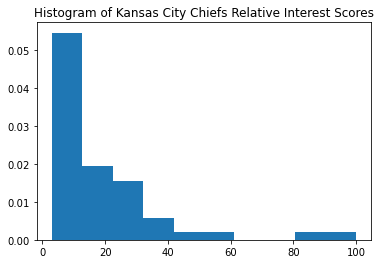

In [63]:
#Initial Observations and Plotting
x = np.arange(0,53,1)

y = np.arange(0,33,1)

pt.figure(0)
pt.plot(x, population_data[:,1], label = 'Taylor Swift')
pt.plot(x, population_data[:,2], label = 'Travis Kelce')
pt.plot(x, population_data[:,3], label = 'Kansas City Chiefs')
pt.xlabel('Week')
pt.ylabel('Relative Interest')
pt.title('Relative Interest Previous Year')
pt.legend()



pt.figure(1)
pt.plot(y, post24data[:,1], label = 'Taylor Swift')
pt.plot(y, post24data[:,2], label = 'Travis Kelce')
pt.plot(y, post24data[:,3], label = 'Kansas City Chiefs')
pt.xlabel('Day Since 9/24')
pt.ylabel('Relative Interest')
pt.title('Relative Interest Since 9/24')
pt.legend()

pt.figure(2)
pt.plot(y, post24data_kansas[:,1], label = 'Taylor Swift')
pt.plot(y, post24data_kansas[:,2], label = 'Travis Kelce')
pt.plot(y, post24data_kansas[:,3], label = 'Kansas City Chiefs')
pt.xlabel('Day Since 9/24')
pt.ylabel('Relative Interest')
pt.title('Relative Interest Since 9/24 - Kansas')
pt.legend()

pt.figure(3)
pt.plot(y, post24data_games[:,1])
pt.xlabel('Day Since 9/24')
pt.ylabel('Number of Games Attended')
pt.title('Number of Games Attended since 9/24')

pt.figure(4)
pt.hist(population_data[:,1], density= True, bins=10)
pt.title('Histogram of Taylor Swift Relative Interest Scores');

pt.figure(5)
pt.hist(population_data[:,2], density= True, bins=10)
pt.title('Histogram of Travis Kelce Relative Interest Scores');

pt.figure(6)
pt.hist(population_data[:,3], density= True, bins=10)
pt.title('Histogram of Kansas City Chiefs Relative Interest Scores');

Mean of Taylor Swift relative interest five weeks before first chiefs game 59.2
Mean of Taylor Swift relative interest post first chiefs game 67.0
[38 34 45 79 100 80 100 65 47 43]
9
The p-value is: 0.27380952380952384


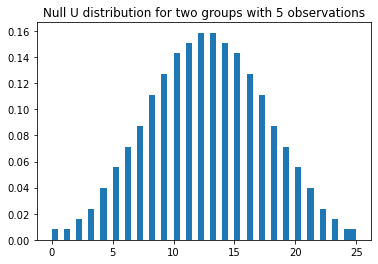

In [84]:
#U testing Taylor Swift


output = it.permutations('AAAAABBBBB',10)
output = list(output)
output = list(set(output)) #prune list of permutations to unique sets of permutations
U = []

for i in range(len(output)):
    count = 0
    myarray = np.array(output[i])
    for j in range(len(myarray)):
        if myarray[j]== 'A':
            for k in range(j+1,len(myarray)):
                if myarray[k] == 'B':
                    count = count + 1
    U.append(count)

pt.hist(U, density= True, bins=50)
pt.title('Null U distribution for two groups with 5 observations');

a = np.array(population_data[len(population_data)-5:len(population_data),1])
b = np.array(post24data[0:5,1])

print("Mean of Taylor Swift relative interest five weeks before first chiefs game", np.mean(a))
print("Mean of Taylor Swift relative interest post first chiefs game",np.mean(b))

alldata = np.concatenate((a,b))
datalabels = []

for i in range(len(alldata)):
    if i < 5:
        datalabels.append('A')
    else:
        datalabels.append('B')

for i in range(10):
    for i in range(len(alldata)-1):
        if alldata[i] < alldata[i+1]:
            alldata[i], alldata[i+1] = alldata[i+1],alldata[i]
            datalabels[i], datalabels[i+1] = datalabels[i+1],datalabels[i]
count = 0
for j in range(len(datalabels)):
    if datalabels[j]== 'A':
        for k in range(j+1,len(datalabels)):
            if datalabels[k] == 'B':
                count = count + 1

print(count)
print('The p-value is:',(np.sum(count>=np.array(U))/ len(U)))


        

In [99]:
#U testing Travis Kelce

a = np.array(population_data[len(population_data)-5:len(population_data),2])
b = np.array(post24data[0:5,2])

print("Mean of Travis Kelce relative interest five weeks before first chiefs game", np.mean(a))
print("Mean of Travis Kelce relative interest post first chiefs game",np.mean(b))

alldata = np.concatenate((a,b))
datalabels = []


for i in range(len(alldata)):
    if i < 5:
        datalabels.append('A')
    else:
        datalabels.append('B')

for i in range(10):
    for i in range(len(alldata)-1):
        if alldata[i] < alldata[i+1]:
            alldata[i], alldata[i+1] = alldata[i+1],alldata[i]
            datalabels[i], datalabels[i+1] = datalabels[i+1],datalabels[i]
count = 0
for j in range(len(datalabels)):
    if datalabels[j]== 'A':
        for k in range(j+1,len(datalabels)):
            if datalabels[k] == 'B':
                count = count + 1

print(count)
print('The p-value is:',(np.sum(count>=np.array(U))/ len(U)))


Mean of Travis Kelce relative interest five weeks before first chiefs game 34.6
Mean of Travis Kelce relative interest post first chiefs game 62.4
5
The p-value is: 0.07539682539682539


In [100]:
#U testing Kansas City Chiefs

a = np.array(population_data[len(population_data)-5:len(population_data),3])
b = np.array(post24data[0:5,3])

print("Mean of Kansas City Chiefs relative interest five weeks before first chiefs game", np.mean(a))
print("Mean of Kansas City Chiefs relative interest post first chiefs game",np.mean(b))

alldata = np.concatenate((a,b))
datalabels = []

for i in range(len(alldata)):
    if i < 5:
        datalabels.append('A')
    else:
        datalabels.append('B')

for i in range(10):
    for i in range(len(alldata)-1):
        if alldata[i] < alldata[i+1]:
            alldata[i], alldata[i+1] = alldata[i+1],alldata[i]
            datalabels[i], datalabels[i+1] = datalabels[i+1],datalabels[i]
count = 0
for j in range(len(datalabels)):
    if datalabels[j]== 'A':
        for k in range(j+1,len(datalabels)):
            if datalabels[k] == 'B':
                count = count + 1

print(count)
print('The p-value is:',(np.sum(count<=np.array(U))/ len(U)))


Mean of Kansas City Chiefs relative interest five weeks before first chiefs game 28.8
Mean of Kansas City Chiefs relative interest post first chiefs game 25.4
18
The p-value is: 0.15476190476190477


In [85]:
#Mixed Effects Model - Taylor Swift

kansas_taylor = kansas_taylor.astype(float)

interaction = np.multiply(games_attended,kansas_travis)

# Need to make array matrices. This is for when there is an intercept
X = np.c_[np.ones(33),games_attended,kansas_travis,interaction]

tmp1 = inv(np.matmul(np.transpose(X),X))


INTERCEPT1, SLOPE1, SLOPE2, INTERACTION  = tmp1 @ np.transpose(X) @ taylor 

print(INTERCEPT1,SLOPE1,SLOPE2,INTERACTION)

#Check with stats model

model1 = sm.OLS(taylor,X).fit()
print(model1.summary())


11.917724338844875 2.730989225191266 0.8068292499499955 0.0871425062003265


In [87]:
#Mixed Effects Model-Travis Kelce


kansas_travis = kansas_travis.astype(float)
travis = travis.astype(float)

interaction = np.multiply(games_attended,kansas_taylor)

# Need to make array matrices. This is for when there is an intercept
X = np.c_[np.ones(33),games_attended,kansas_taylor,interaction]



tmp1 = inv(np.matmul(np.transpose(X),X))


INTERCEPT1, SLOPE1, SLOPE2, INTERACTION  = tmp1 @ np.transpose(X) @ travis

print(INTERCEPT1,SLOPE1,SLOPE2,INTERACTION)

#Check with stats model
model1 = sm.OLS(travis,X).fit()
print(model1.summary())

14.372114616158072 -3.63993370559374 0.8704871023639177 -0.11517820044267177
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     47.17
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           2.82e-11
Time:                        12:20:42   Log-Likelihood:                -115.84
No. Observations:                  33   AIC:                             239.7
Df Residuals:                      29   BIC:                             245.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [88]:
#Regression Analysis- Chiefs
import pandas as pd 
import numpy as np

kansas_chiefs = kansas_chiefs.astype(float)
chiefs = chiefs.astype(float)

# Need to make array matrices. This is for when there is an intercept
X = np.c_[np.ones(33),games_attended,kansas_taylor,kansas_travis]

tmp1 = inv(np.matmul(np.transpose(X),X))


INTERCEPT1, SLOPE1, SLOPE2, SLOPE3  = tmp1 @ np.transpose(X) @ chiefs

print(INTERCEPT1,SLOPE1,SLOPE2,SLOPE3)

#Check with stats model
model1 = sm.OLS(chiefs,X).fit()
print(model1.summary())

-0.6641045150474287 -0.8152322115440612 2.0863551886223277 -1.44963607430166
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     15.26
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           3.81e-06
Time:                        12:22:27   Log-Likelihood:                -140.57
No. Observations:                  33   AIC:                             289.1
Df Residuals:                      29   BIC:                             295.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [96]:
#Simple Regression Equation-Predict Taylor from Travis

#outcome varaibles
taylor = post24data[:,1]
travis = post24data[:,2]
chiefs = post24data[:,3]

#prediciting varaibles 
kansas_taylor = post24data_kansas[:,1]
kansas_travis = post24data_kansas[:,2]
kansas_chiefs = post24data_kansas[:,3]

games_attended = post24data_games[:,1]


# Need to make array matrices. This is for when there is an intercept
X = np.c_[np.ones(33),kansas_travis]

X = X.astype(float)

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))

INTERCEPT, SLOPE = tmp @ np.transpose(X) @ taylor
print("Our intercept is ",INTERCEPT, "and our slope is", SLOPE)

#check with stats model
import statsmodels.api as sm

games_attended = games_attended.astype(float)
kansas_travis = kansas_travis.astype(float)
taylor = taylor.astype(float)
model = sm.OLS(taylor,sm.add_constant(kansas_travis)).fit()

# erase the add constant above to remove the intercept of the model.
print(model.summary())

Our intercept is  23.318231587645897 and our slope is 0.836783390145647
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     57.23
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.58e-08
Time:                        14:28:36   Log-Likelihood:                -127.74
No. Observations:                  33   AIC:                             259.5
Df Residuals:                      31   BIC:                             262.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [95]:
#Simple Regression - Predict Travis from Taylor

#outcome varaibles
taylor = post24data[:,1]
travis = post24data[:,2]
chiefs = post24data[:,3]

#prediciting varaibles 
kansas_taylor = post24data_kansas[:,1]
kansas_travis = post24data_kansas[:,2]
kansas_chiefs = post24data_kansas[:,3]

games_attended = post24data_games[:,1]


# Need to make array matrices. This is for when there is an intercept
X = np.c_[np.ones(33),kansas_taylor]

X = X.astype(float)

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))

INTERCEPT, SLOPE = tmp @ np.transpose(X) @ travis
print("Our intercept is ",INTERCEPT, "and our slope is", SLOPE)

#check with stats model
import statsmodels.api as sm

games_attended = games_attended.astype(float)
kansas_travis = kansas_travis.astype(float)
kansas_taylor = kansas_taylor.astype(float)
travis = travis.astype(float)
taylor = taylor.astype(float)
model = sm.OLS(travis,sm.add_constant(kansas_taylor)).fit()

# erase the add constant above to remove the intercept of the model.
print(model.summary())

Our intercept is  0.6371917080301701 and our slope is 0.761534608916595
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     65.51
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           3.86e-09
Time:                        14:27:23   Log-Likelihood:                -126.33
No. Observations:                  33   AIC:                             256.7
Df Residuals:                      31   BIC:                             259.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------